# Chapter 5: Machine Learning

## What is Machine Learning?

Fundamentally, machine learning involves building mathematical models to help understand data.
Models *learn* when they are given tunable parameters that can be adapted to observed data.
Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data.

### Categories of Machine Learning

Machine learning can fundamentally be categorized into supervised and unsupervised learning.

*Supervised learning* involves modeling the relationship between measured features of the data and some label associated with the data.
This is further subdivided into *classification* and *regression* tasks.

*Unsupervised learning* invovles modeling the features of a dataset without reference to any label, often described as "letting the data speak for itself."
These models include tasks such as *clustering* and *dimensionality reduction*.

There is also *semi-supervised learning* somewhere between the two, which is often useful when only incomplete labels are available.

## Introducing Scikit-Learn

### Data Representation in Scikit_learn

Consider the Iris dataset, which is available as a Pandas `DataFrame` using the Seaborn library:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Generally, we refer to the rows of the matrix as *samples*, and the number of rows as `n_samples`.
Likewise, we refer to the columns as *features*, and the number of columns as `n_features`.

By convention, the features matrix is stored in a variabble named `X`, with 2-d shape `[n_samples, n_features]`, and is most often contained in a NumPy array or Pandas `DataFrame`.
The features (i.e. columns) always refer to distinct observations that describe each sample in a quantitative manner.
They are generally real-valued, but may be Boolean or discrete-valued in some cases.

The *label* or *target* array is conventionally called `y`.
It is usually one dimensional with length `n_samples`, and is generally contained in a NumPy array or Pandas `Series`.
It may consist of continuous numerical values, or discrete classes/labels.
Some Scikit-Learn estimators do handle multiple tartget values, but we will primarily be working with one-dimensional targets.

Visualize the Iris features, stratified by the target `species`:

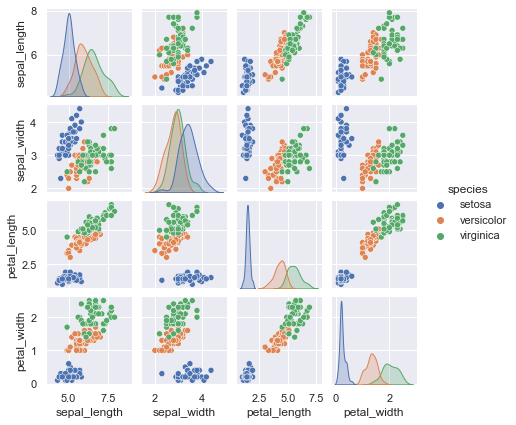

In [2]:
%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species', height=1.5);

For use with Scikit-Learn, extract the features matrix and target array from `iris`:

In [3]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
X_iris.shape, y_iris.shape

((150, 4), (150,))

### Scikit-Learn's Estimator API

Using the Scikit-Learn estimator API usually involves these steps:

1. Choose a class of model and import it from Scikit-Learn
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into features matrix and target vector.
4. Fit the model to the data by calling the `fit()` method of the model instance.
5. Apply the model to new data:
    * For supervised learning, we often predict labels for unknown data using `predict()`.
    * For unsupervised learning, we often transform or infer properties of the data using `transform()` or `predict()` methods.

As an example, consider a simple linear regression.

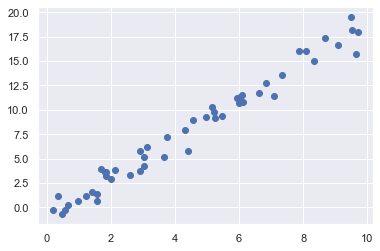

In [4]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [5]:
# 1. Choose a class of model
from sklearn.linear_model import LinearRegression

# 2. Hyperparameters: fit an intercept
model = LinearRegression(fit_intercept=True)

# 3. Arrange data. Note that the data needs to be pivoted from a vector to a matrix [n_samples, n_features]
X = x[:, np.newaxis]
X.shape

(50, 1)

In [6]:
# 4. Fit the model to the data
model.fit(X, y)

LinearRegression()

In [7]:
# All model parameters that were learned from `fit()` have trailing underscores
model.coef_, model.intercept_


(array([1.9776566]), -0.903310725531111)

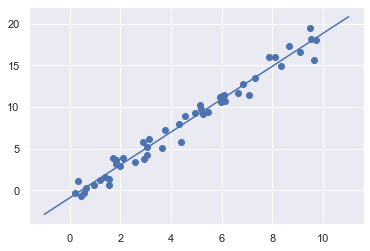

In [8]:
# 5. Predict labels for unknown data
# Make some 'new' data
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit);

Next, we consider the Iris dataset from earlier. Our question is: given a model trained on a subset of the data, how well can we predict the remaining labels?
For this, we will use the simple generative model Gaussian naive Bayes, which assumes each class is drawn from an axis-aligned Gaussian distribution.
This is a good choice for a baseline model because it is fast and has no hyperparameters to choose.

Split the data into *training* and *testing* sets with the `train_test_split` utility function:

In [9]:
# Note that `sklearn.cross_validation` is no longer the submodule
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, )

Check out the size of the dataframes:

In [10]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((112, 4), (38, 4), (112,), (38,))

Fit the model to the train set and predict the labels on the test set:

In [11]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Now use `accuracy_score` to see the fraction of correctly predicted labels:

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9473684210526315

Next, we will attempt to reduce the dimensionality of the Iris data to more easily visualize it in two dimensions (from four dimensions).
For this, we use principal components analysis and specify two components:

In [13]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris) # Note that y is not specified
X_2d = model.transform(X_iris) # Transform the data using the fit model


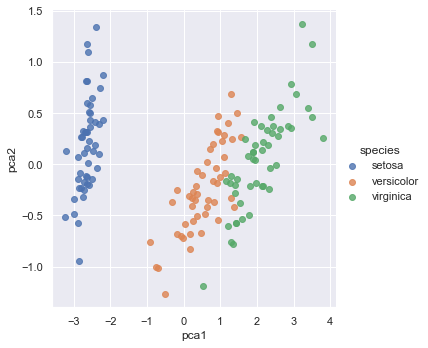

In [14]:
iris['pca1'] = X_2d[:, 0]
iris['pca2'] = X_2d[:, 1]
sns.lmplot(x='pca1', y='pca2', data=iris, hue='species', fit_reg=False);

And another unsupervised example: clustering with a Gaussian mixture model:

In [15]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)


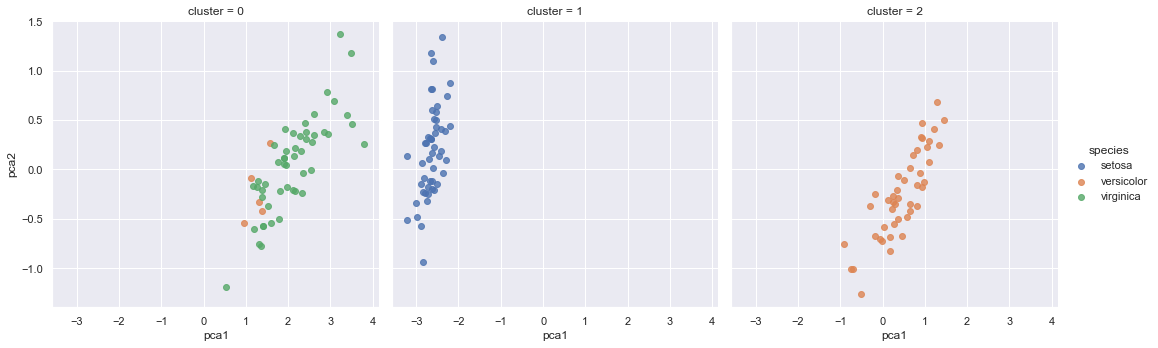

In [16]:
iris['cluster'] = y_gmm
sns.lmplot(data=iris, x='pca1', y='pca2', hue='species', col='cluster', fit_reg=False);

### Application: Exploring Handwritten Digits

Import the `digits` data available from `sklearn.datasets`:

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

These are three-dimensional arrays which can be visualized:

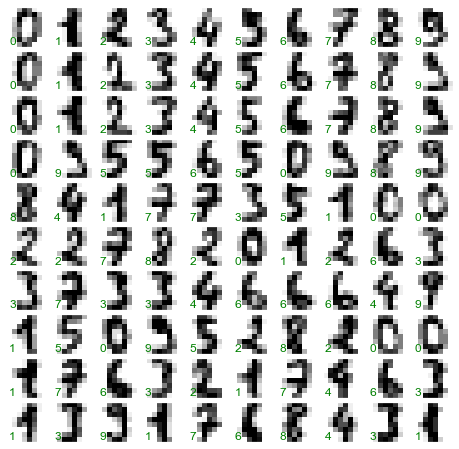

In [18]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color = 'green')

In order to work with this data in Scikit-Learn, it needs to be represented as two-dimensional `[n_samples, n_features]`.
To do this, we can treat each pixel in the image as a feature by flattening out the pixel arrays.
This, along with the digit labels, are contained in the `data` and `target` attributes:

In [19]:
X = digits.data
y = digits.target
X.shape, y.shape

((1797, 64), (1797,))

There are 1797 total images, with 64 features corresponding to the 64 pixels (8x8 grid).

In order to visualize the 64 features, we'll reduce the parameter space to two dimensions using unsupervised manifold learning algorithm called *Isomap*:

In [20]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

C:\Users\tdunn\Documents\python\python-data-science-handbook\.venv\lib\site-packages\sklearn\manifold\_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\tdunn\Documents\python\python-data-science-handbook\.venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

Now that the data are two-dimensional, we can plot it and see if we can learn anything from its structure:

C:\Users\tdunn\AppData\Local\Temp\ipykernel_11428\3832024680.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='digit label', ticks=range(10))


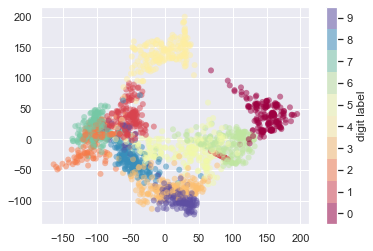

In [21]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

Some of the digits, for example "1" and "0" are well-separated.
Others, like "1" and "4", have a lot of overlap.
Regardless, a straightforward supervised classification algorithm should perform suitably on this data.
Split into training and testing sets and fit a Gaussian naive Bayes model:

In [22]:
from sklearn.model_selection import train_test_split
# I'm not setting the `test_size` or `train_size`, but leaving default 20-80
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Visualize this performance with a confusion matrix:

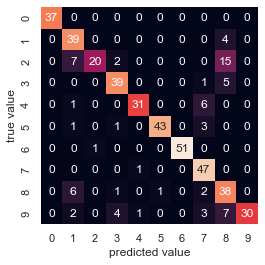

In [23]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

This is a nice way to see where the misclassifications occur.
For example, many "2"s are predicted to be "8" or "1".

Plot the inputs again, with their predicted labels (green for correct, red for incorrect):

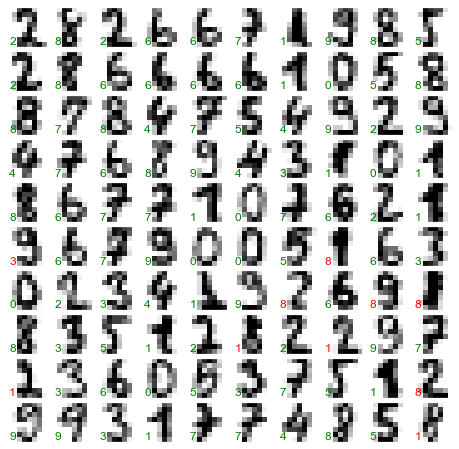

In [24]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
                    
test_images = Xtest.reshape(-1, 8, 8)
                    
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

### Summary

>In this section we have covered the essential features of the Scikit-Learn data representation, and the estimator API. Regardless of the type of estimator, the same import/instantiate/fit/predict pattern holds. Armed with this information about the estimator API, you can explore the Scikit-Learn documentation and begin trying out various models on your data.

>In the next section, we will explore perhaps the most important topic in machine learning: how to select and validate your model.

## Hyperparameters and Model Validation

### Thinking About Model Validation

In order to make informed choices on which model and which hyperparameters we use in supervised learning, we need a way to *validate* that our choices are a good fit to the data.

To illustrate some of the pitfalls in model validation, we first demonstrate a naive approach using the Iris data:

In [25]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

In [26]:
from sklearn.neighbors import KNeighborsClassifier
# Use a KNN classifier with 1 neighbor, i.e. a point is given the same label as the nearest training point
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_model = model.predict(X)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

We get 100% accuracy because the model is trained and evaluated on the same data.
Moreover, this is a nearest neighbor model with $k$ = 1, which means each predicted point's nearest neighbor in the training set is itself.

We can get a better sense of a model's performance by using a *holdout set*.
This can be done with the `train_test_split` function in Scikit-Learn:

In [28]:
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

# Fit the model on one set of data
model.fit(X1, y1)
# Evaluate on the other set
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

The downside of this approach is that we have lost a portion (50% here) of the data to the model training.
This can especially be a problem if the initial set of training data is small.
An alternative is *cross-validation*, which each subset of the data is used both as training and validation sets.
Using the splits from before:

In [29]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

We could then combine these accuracy scores (by taking the mean for example) to get a better measure of the global model performance.
This particular form of cross-validation is a *two-fold CV*.
We can split the data into more groups/folds with `cross_val_score`.
Here, five-fold CV will split the data into 80-20 training-validation:

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

There are a number of cross-validation strategies available in Scikit-Learn.
For example, we can go to the extreme and set the number of folds equal to the number of data points.
This is known as *leave-one-out* cross-validation, in which the model is trained on all but one data point, and then evaluated on the held out data point.

In [31]:
from sklearn.model_selection import LeaveOneOut

#loo = LeaveOneOut()
#loo.get_n_splits(X)

scores = cross_val_score(model, X, y, cv=LeaveOneOut())
# 150 scores, taking the mean gives an estimate of the accuracy
scores, scores.mean()

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 0.96)

### Selecting the Best Model

Of core importance is the following question: *if our estimator is underperforming, how should we move forward?*
There are several possible answers:

* Use a more complicated/more flexible model
* Use a less complicated/less flexible model
* Gather more training samples
* Gather more data to add features to each sample

Fundamentally, the question of "the best model" is about finding a sweet spot in the trade-off between *bias* and *variance*.
A model with high bias tends to underfit the data because it does not have enough flexibility to suitably account for all the features in the data.
A model with high variance tends to overfit the data because it has so much fleixibility that it ends up accounting for random errors as well as the underlying data distribution.

If we have some ability to tune the model complexity/flexibility, we can generally find a sweet spot of performance.
This idea is illustrated in Figure 5-26, in which we see the following essential featuers:

* The training score is higher than the validation score everywhere. This is generally the case: the model will be a better fit to the data it has seen compared to held out data.
* For low model complexity (high bias), the training data is underfit, which means that the model will be a poor predictor for both the training and validation data.
* For high model complexity (high variance), the training data is overfit, which means that the model predicts the training data very well, but fails for unseen validation data.
* For some intermediate model complexity, the validation performance has a maximum, which indicates a suitable trade-off between bias and variance.

Let's look at an example with a *polynomial regression* model, in which the degree of the polynomial is a tunable parameter.

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Combine simple linear regression and polynomial preprocessor in a pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

# Create some data
def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

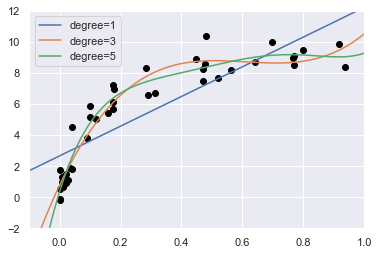

In [33]:
# Visualize the simulated data, along with various polynomial degree fits
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

We can visualize a validation curve for this particular data and model with the `validation_curve` function:

In [34]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          param_name='polynomialfeatures__degree', param_range=degree, cv=7)

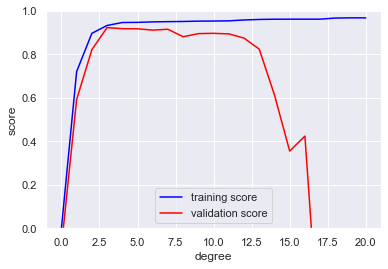

In [35]:
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

We can see that the optimal trade-off between bias and variance is found for a third-order polynomial.
Compute and display this polynomial over the original data:

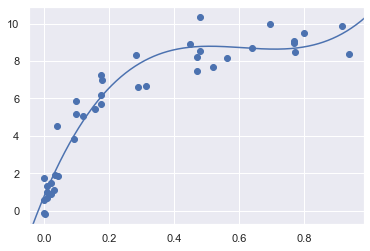

In [36]:
plt.scatter(X, y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test, y_test)
plt.axis(lim);

### Learning Curves

One important aspect of model complexity is that the optimal model will generally depend on the size of your training data. For example, generate a new dataset with a factor of five more points:

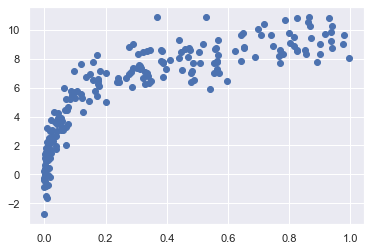

In [37]:
X2, y2 = make_data(200)
plt.scatter(X2, y2);

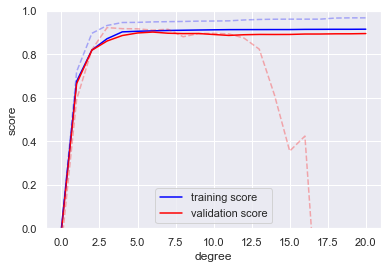

In [38]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, param_name='polynomialfeatures__degree', param_range=degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

It is clear from the solid red curve that this much large data set can support a much more complicated model.
Even a 20 degree polynomial is not overfitting the data.

Thus we see that the behavior of the validation curve depends on both the model complexity and the number of training observations.
The latter can be investigated with a *learning curve* of training/validation score versus size of the training set.
The general behavior we would expect:

* A model of a given complexity will overfit a small dataset, leading to high training score but low validation score.
* A model of a given comlpexity will underfit a large dataset, leading to decreased training score but increased validation score.
* A model will never, except by change, give a better score with the validation set than the training set, so the curves should keep getting closer together but never cross.
* At a certain point, you have enough data points that a particular model has *converged*, and more training data will not help performance.

Scikit-Learn has the convenient `learning_curve` utility for plotting this:

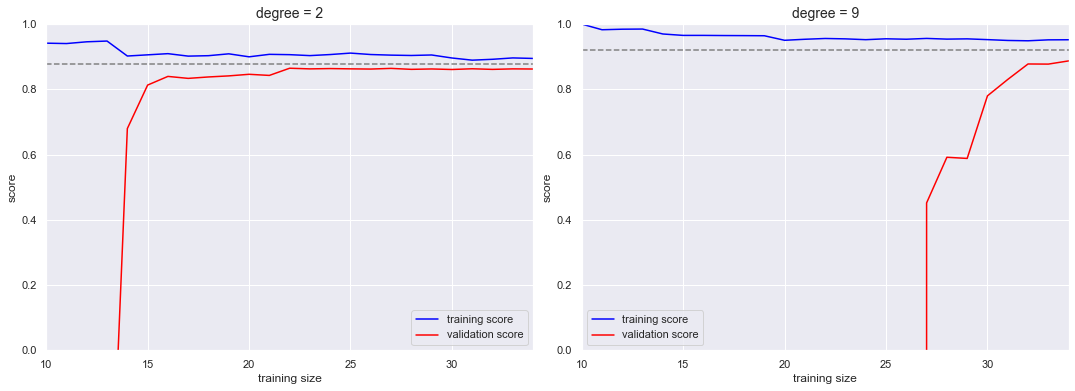

In [39]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv=7, train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

Here we see that the much more complicated model (right: 9 degree polynomial) has a higher converged score (shown by the dashed line) but at the expense of higher model variance (indicated by the difference between the training and validation scores).
With more data points, the learning curve for the more complicated model would eventually converge.

### Validation in Practice: Grid Search

In practice, models have more than one knob to turn (hyperparameters to tune), and thus plots of validation and learning curves change from lines to multidimensional surfaces.
In these cases, such visualizations are difficult and we would rather simply find the particular model that maximizes the validation score.

We can do this with the `grid_search` module.
Here is an example of using grid search to vary the optimal polynomial degree, whether an intercept is fit, and whether the data are normalized:

In [40]:
from sklearn.model_selection import GridSearchCV


param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [49]:
# Like a normal estimator, this has not yet been applied to any data
# Fit the model at each grid point
#grid.fit(X, y);

# This returns a ton of FutureWarnings:
# 'normalize' was deprecated in version 1.0 and will be removed in 1.2.

# Here is the new way to do this

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), StandardScaler(),
                         LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(X, y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [42]:
# Now find the best parameters
grid.best_estimator_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression',
                 LinearRegression(fit_intercept=False, normalize=True))])

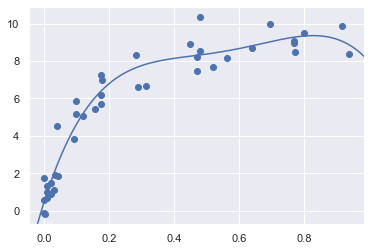

In [53]:
model = grid.best_estimator_

plt.scatter(X, y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test, y_test)
plt.axis(lim);

### Summary

>In this section, we have begun to explore the concept of model validation and hyperparameter optimization, focusing on intuitive aspects of the bias–variance trade-off and how it comes into play when fitting models to data. In particular, we found that the use of a validation set or cross-validation approach is vital when tuning parameters in order to avoid over-fitting for more complex/flexible models.

>In later sections, we will discuss the details of particularly useful models, and throughout will talk about what tuning is available for these models and how these free parameters affect model complexity. Keep the lessons of this section in mind as you read on and learn about these machine learning approaches!

## Feature Engineering

All of the examples so far assumed nice tidy `[n_samples, n_features]` data sets.
In the real world, data rarely come in such a form.
With this in mind, one of the more important steps in using machine learning in practice is *feature engineering*.

### Categorical Features

Consider this `data` on housing prices, with a categorical `neighborhood` feature:

In [44]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

Encoding `neighborhood` with number mapping like `{'Queen Ann': 1, 'Fremont': 2, ...}` would imply that there is an ordering to the neighborhoods, which doesn't really make sense here.

The proven technique is *one-hot encoding* which creates extra columns indicating presence or absence of a category.
Scikit-Learn's `DictVectorizer` can be used to convert a dictionary:

In [45]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [46]:
# Note the function in the book is deprecated
vec.get_feature_names_out()

array(['neighborhood=Fremont', 'neighborhood=Queen Anne',
       'neighborhood=Wallingford', 'price', 'rooms'], dtype=object)

In [47]:
# Transformation can be easily reversed
data_transformed = vec.fit_transform(data)
vec.inverse_transform(data_transformed)

[{'neighborhood=Queen Anne': 1, 'price': 850000, 'rooms': 4},
 {'neighborhood=Fremont': 1, 'price': 700000, 'rooms': 3},
 {'neighborhood=Wallingford': 1, 'price': 650000, 'rooms': 3},
 {'neighborhood=Fremont': 1, 'price': 600000, 'rooms': 2}]

Other tools for this type of encoding are `sklearn.preprocessing.OneHotEncoder` and `sklearn.feature_extraction.FeatureHasher`.

### Text Features

There are many ways to convert text to a set of representative numerical values.
One of the simplest is with *word counts*:

In [48]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

# We could count the occurence of each word:
evil_count = [sum([s.lower() == 'evil' for s in phrase.split(' ')]) for phrase in sample]
evil_count

[1, 1, 0]

In [49]:
# But sklearn has helper functions
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

This outputs a sparse matrix with a row per observation and a column per word/feature. The values are the word counts.
We can inspect the sparse matrix by converting it into a `DataFrame`

In [50]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


One of the problems with this is that it puts too much weight on words that appear very frequently, which can be suboptimal in some classification algorithms.
To fix this, one approach is *term frequency-inverse document frequency* (TF-IDF) which weights word counts by how often they appear in documents:

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns = vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


### Image Features

The simplest approach to encode images is to use the pixel values themselves, but this is likely not optimal.
A comprehensive summary is out of scope of this section, but there are many implementations available in the [Scikit-Image project](https://scikit-image.org/) and an example application on page 506 of the text.

### Derived Features

Derived features are those that come from some input features, like *polynomial features* from previous example.
For example, this data clearly cannot be described by a straight line:

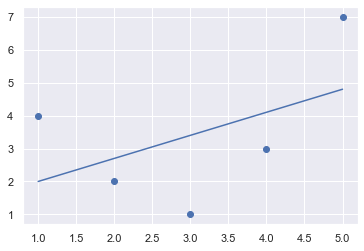

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])

from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

In [53]:
# Add polynomial features as extra columns to drive more flexibility in the model
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


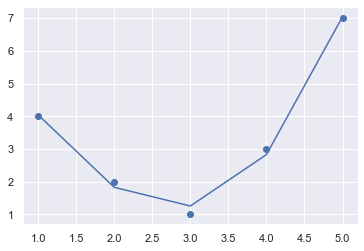

In [54]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

### Imputation of Missing Data

We saw that often the `NaN` value is used to mark missing values in `DataFrames`:

In [55]:
X = np.array([[ np.nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   np.nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

Typical machine learning models need to replace missing data with some appropriate fill value, which is known as *imputation* of missing values.
This can be simple (e.g. replacing with the mean of the column) or sophisticated (e.g. matrix completion or a robust model that handles such data).

Scikit-Learn provides the `Imputer` class:

In [56]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer()
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [57]:
# This imputed data can be fed directly into a model
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

### Feature Pipelines

To streamline the steps of data processing, Scikit-Learn provides a pipeline object:

In [58]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'), PolynomialFeatures(degree=2), LinearRegression())
model.fit(X, y)
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


## In Depth: Naive Bayes Classification

### Bayesian Classificiation

Naive Bayes is based on Bayes theorem:

$$
P(L|\text{features}) = \frac{P(\text{features}|L) P(L)}{P(\text{features})}
$$

In Bayesian classification, we are interested in finding the probability of a label $L$ given the observed features.
If we are trying to decide between two labels $L_1$ and $L_2$, then one way is to compute the ratio of posterior probabilities for each label:

$$
\frac{P(L_1|\text{features})}{P(L_2|\text{features})} = \frac{P(\text{features}|L_1) P(L_1)}{P(\text{features}|L_2) P(L_2)}
$$

We then need a generative model for which to compute $P(\text{features}| L_i)$ for each label.
The "naive" approach is to make very naive assumptions about the model for each label.

In [59]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Gaussian Naive Bayes

The first type of naive Bayes classifier is Gaussian naive Bayes.
The assumption here is that *data from each label is drawn from a simple Gaussian distribution*.


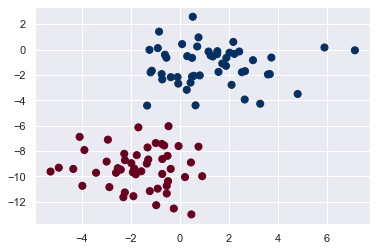

In [60]:
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [61]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

In [62]:
# Generate some new data and predict the label
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)
ynew

array([1, 1, 1, ..., 0, 1, 1])

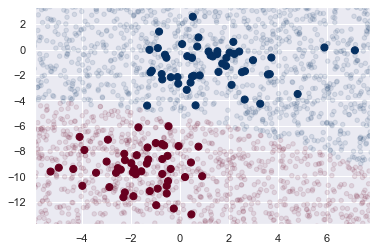

In [63]:
# Visualize the new data to get an idea of the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

The decision boundary is slightly curved. In general, the boundary in Gaussian NB is quadratic.

A nice bonus of the Bayesian formalism is that is naturally allows for probabilistic classification, which we can compute using the `predict_proba` method:

In [64]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

The columns give the posterior probabilities of the two classes.
Bayesian approaches like this are useful if you are looking for estimates of uncertainty in classification.

### Multinomial Naive Bayes

The idea here is the same, except that instead of modeling the data distribution with the best-fit Gaussian, we model with a best-fit multinomial distribution (describing the probability of observing counts among a number of categories).
It is often used in text classification, where the features are related to word counts or frequencies within the documents to be classified.

For example, here we use the 20 Newsgroups corpus data:

In [65]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()

In [66]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [67]:
# For simplicity, select just a few categories and download the training and testing sets
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [68]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [69]:
# Count relative word frequency with a TF-IDF vector
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)
labels = model.predict(test.data)

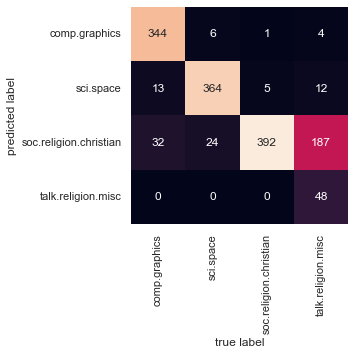

In [70]:
# Confusion matrix between true and predicted
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Unsurprisingly, the model had trouble distinguishing talk about religion and talk about Christianity.

We can use this model to predict *any* string:

In [71]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

predict_category('sending a payload to the ISS'), predict_category('discussing islam vs atheism'), predict_category('determining the screen resolution')

('sci.space', 'soc.religion.christian', 'comp.graphics')

### When to Use Naive Bayes

Naive Bayes classifiers make stringest assumptions about data, so they will generally not perform as well as a more complicated model. That said, they have several advantages:

* They are extremely fast for both training and prediction
* They provide straightforward probabilistic prediction
* They are often easily interpretable
* They have very few (if any) tunable paramters

This makes NB a good choice as an initial baseline classification.

They are especially good models:

* when the naive assumptions actually match the data (very rare in practice)
* for very well-separated categories (and therefore model complexity is less important)
* for very high-dimensional data (and again, model complexity is less important)

## In Depth: Linear Regression

Just as naive Bayes is a good starting point for classification tasks, linear regression models are a good starting point for regression tasks.

### Simple Linear Regression

We will start with the most familiar straight-line fit to the data, $y= mx + b$.

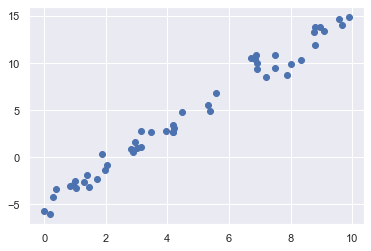

In [72]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

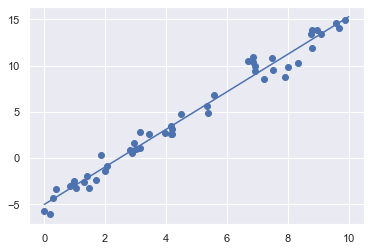

In [73]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

xfit = np.linspace(0, 10, 100)
yfit = model.predict(xfit.reshape(-1, 1))

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [74]:
# Print the coefficients
print(f'Slope: {model.coef_[0]:.4}')
print(f'Intercept: {model.intercept_:.4}')

Slope: 2.027
Intercept: -4.999


### Basis Function Regression

One trick to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.
We have seen this befor with the polynomial regression:

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \dots
$$

Notice that this is still a linear model -- the coefficients never multiply or divide each other.
What we have done is taken our one-dimensional $x$ values and projected them into higher dimensions, so that we can fit a more complicated non-linear relationship.
The polynomial basis functions are built with `PolynomialFeatures`:

In [75]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

The cleanest way to use a transformer like this is with a `pipeline`:

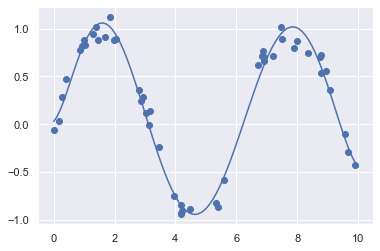

In [76]:
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

# A sine wave example
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Other basis functions are possible, like a sum of Gaussian bases.
These are not built into Scikit-Learn, but can be written as a custom transformer:

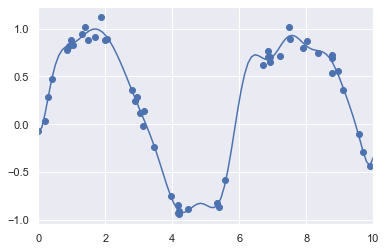

In [77]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""

    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg**2, axis))

    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)

        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)


gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

### Regularization

With many basis functions, our model can become very flexible, but this can lead to overfitting. For example

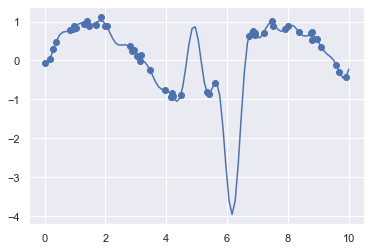

In [78]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]));

We can see the reason for this flexibility by plotting the coefficients of the Gaussian bases:

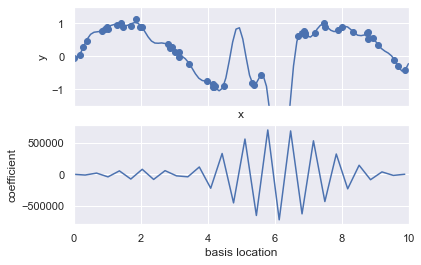

In [79]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)
    
    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location', ylabel='coefficient', xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

Perhaps the most common form of regularization is *ridge regression* which penalizes the sum of sqaures of the model coefficients.
It involves a penalty parameter $\alpha$ that controls the strength of the regularization.

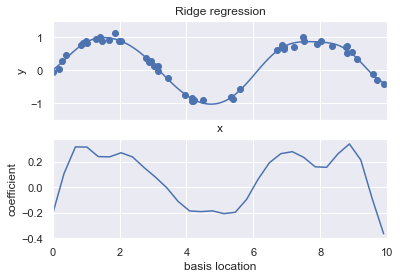

In [80]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge regression')

Another type of regularization is lasso, which penalizes the sum of absolute values of the regression coefficients.

C:\Users\tdunn\Documents\python\python-data-science-handbook\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


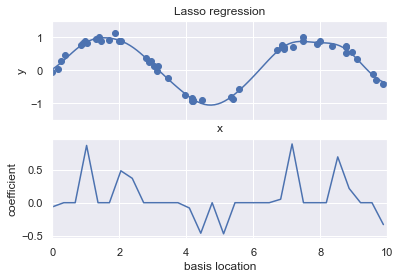

In [81]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso regression')

### Example: Predicting Bicycle Traffic

In [82]:
#!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [83]:
import pandas as pd
counts = pd.read_csv('../data/FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('../data/BicycleWeather.csv', index_col='DATE', parse_dates=True)

The `counts` data frame is currently hourly:

In [84]:
counts.index

DatetimeIndex(['2012-10-03 00:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2022-07-31 14:00:00', '2022-07-31 15:00:00',
               '2022-07-31 16:00:00', '2022-07-31 17:00:00',
               '2022-07-31 18:00:00', '2022-07-31 19:00:00',
               '2022-07-31 20:00:00', '2022-07-31 21:00:00',
               '2022-07-31 22:00:00', '2022-07-31 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=86136, freq=None)

In [85]:
# Compare to a manaully constructed index
min_datetime = counts.index.min()
max_datetime = counts.index.max()
counts.index.equals(pd.date_range(start=min_datetime, end=max_datetime, freq='1H'))

True

In [86]:
# Are there 24 counts per day?
counts.resample('d').size().value_counts()

24    3589
dtype: int64

Compute total daily counts:

In [87]:
daily = counts.resample('d').sum()
daily

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03,3521.0,1760.0,1761.0
2012-10-04,3475.0,1708.0,1767.0
2012-10-05,3148.0,1558.0,1590.0
2012-10-06,2006.0,1080.0,926.0
2012-10-07,2142.0,1191.0,951.0
...,...,...,...
2022-07-27,3590.0,1407.0,2183.0
2022-07-28,3602.0,1395.0,2207.0
2022-07-29,3046.0,1222.0,1824.0


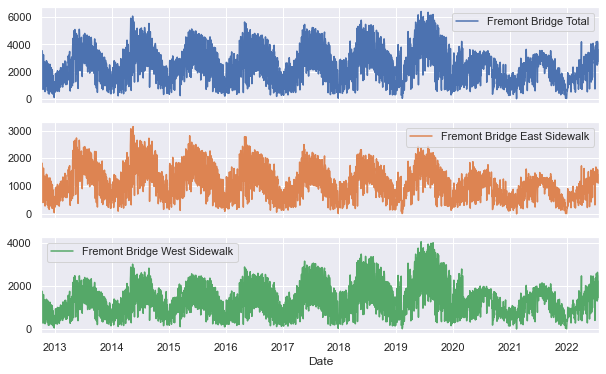

In [88]:
daily.plot(subplots=True, figsize=(10, 6));

In [89]:
# Just keep the sum of all three above channels
daily = daily.sum(axis='columns').to_frame('total')

A feature of importance will be day of the week:

In [90]:
# Dictionary mapping of day of week
dow_dict = dict(zip([i for i in range(0, 7)], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']))
daily['day_of_week'] = [dow_dict[i] for i in daily.index.day_of_week]

<AxesSubplot:xlabel='day_of_week', ylabel='total'>

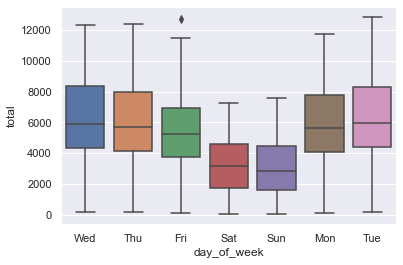

In [91]:
sns.boxplot(data=daily, x='day_of_week', y='total')

Also add holidays:

In [92]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2012', end='2023')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)
daily

,total,day_of_week,holiday
Date,,,
2012-10-03,7042.0,Wed,0.0
2012-10-04,6950.0,Thu,0.0
2012-10-05,6296.0,Fri,0.0
2012-10-06,4012.0,Sat,0.0
2012-10-07,4284.0,Sun,0.0
...,...,...,...
2022-07-27,7180.0,Wed,0.0
2022-07-28,7204.0,Thu,0.0
2022-07-29,6092.0,Fri,0.0


We might also suspect that hours of daylight would affect the count:

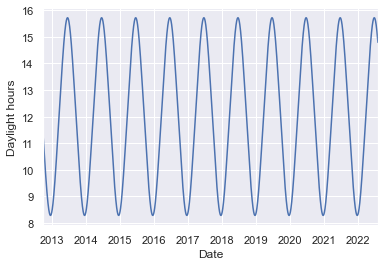

In [93]:
from datetime import datetime

def hours_of_daylight(date, axis=23.44, latitude=47.16):
    """Compute the hours of daylight for the given date"""
    days = (date - datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.


daily['daylight_hours'] = list(map(hours_of_daylight, daily.index))

daily['daylight_hours'].plot(ylabel='Daylight hours');

Now add temperature and total precipitation, as well as a flag to indicate a dry day (zero precipitation):

In [119]:
# Convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['temp'] = (weather['TMIN'] + weather['TMAX']) / 2

# Convert to inches
weather['precip'] = weather['PRCP'] / 254
weather['dry_day'] = (weather['precip'] == 0).astype('int')

# Note that this will reduce the data in `daily` by a lot (weather data goes up to 2015-09-01
daily = daily.join(weather[['temp', 'precip', 'dry_day']], how='inner')

And a counter (in years) that increases from day 1:

In [125]:
daily['annual'] = (daily.index - daily.index[0]).days / 365

,total,day_of_week,holiday,daylight_hours,temp,precip,dry_day,annual
2012-10-03,7042.0,Wed,0.0,11.288694,1.335000e-22,0.0,1,0.000000
2012-10-04,6950.0,Thu,0.0,11.231395,1.360000e-22,0.0,1,0.002740
2012-10-05,6296.0,Fri,0.0,11.174210,1.530000e-22,0.0,1,0.005479
2012-10-06,4012.0,Sat,0.0,11.117147,1.585000e-22,0.0,1,0.008219
2012-10-07,4284.0,Sun,0.0,11.060217,1.585000e-22,0.0,1,0.010959


In [129]:
# Convert `day_of_week` to dummy vars
daily = daily \
    .join(pd.get_dummies(daily['day_of_week'])) \
    .drop('day_of_week', axis='columns')
daily.head()

,total,holiday,daylight_hours,temp,precip,dry_day,annual,Fri,Mon,Sat,Sun,Thu,Tue,Wed
2012-10-03,7042.0,0.0,11.288694,1.335000e-22,0.0,1,0.000000,0,0,0,0,0,0,1
2012-10-04,6950.0,0.0,11.231395,1.360000e-22,0.0,1,0.002740,0,0,0,0,1,0,0
2012-10-05,6296.0,0.0,11.174210,1.530000e-22,0.0,1,0.005479,1,0,0,0,0,0,0
2012-10-06,4012.0,0.0,11.117147,1.585000e-22,0.0,1,0.008219,0,0,1,0,0,0,0
2012-10-07,4284.0,0.0,11.060217,1.585000e-22,0.0,1,0.010959,0,0,0,1,0,0,0


Fit a linear regression model and check out predictions

In [132]:
# Choose the features
features = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun',
            'daylight_hours', 'precip', 'dry_day', 'temp', 'annual']
X = daily[features]
y = daily['total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

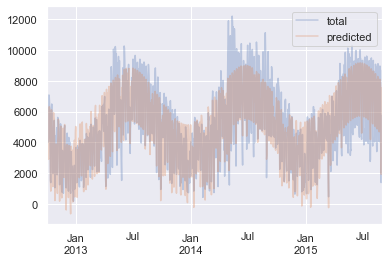

In [135]:
daily[['total', 'predicted']].plot(alpha=0.3);

In [139]:
# Look at the model coefficients
pd.Series(model.coef_, index=model.feature_names_in_)

Mon              -7.217529e+02
Tue              -3.400488e+02
Wed              -3.867087e+02
Thu              -6.594127e+02
Fri              -1.202303e+03
Sat              -3.734514e+03
Sun              -3.791381e+03
daylight_hours    5.087232e+02
precip           -1.222281e+03
dry_day           1.074360e+03
temp              3.851871e-14
annual            1.555543e+02
dtype: float64

In [156]:
pd.Series(model.coef_, index=model.feature_names_in_) \
    .reset_index() \
    .rename(columns={'index': 'coef', 0: 'estimate'}) \
    .style \
    .format({'estimate': '{:.3f}'}) \
    .background_gradient(axis='rows', cmap='YlGnBu', subset='estimate') \
    .hide(axis='index')

coef,estimate
Mon,-721.753
Tue,-340.049
Wed,-386.709
Thu,-659.413
Fri,-1202.303
Sat,-3734.514
Sun,-3791.381
daylight_hours,508.723
precip,-1222.281
dry_day,1074.360


In [159]:
# Estimate uncertainty
from sklearn.utils import resample
np.random.seed(1)

In [160]:
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], axis=0)
err

array([1.88807637e+02, 1.89817542e+02, 1.93726180e+02, 2.02303923e+02,
       1.83428561e+02, 1.76993695e+02, 1.82045718e+02, 1.52830340e+01,
       1.29866463e+02, 8.09847073e+01, 3.94684455e-12, 4.23868053e+01])

In [168]:
pd.DataFrame({'coef': model.feature_names_in_, 'estimate': model.coef_.round(0),
              'error': err.round(0)}) \
    .style \
    .hide(axis='index') \
    .format({'estimate': '{:.1f}', 'error': '{:.1f}'}) \
    .background_gradient(axis='rows', subset=['estimate', 'error'])

coef,estimate,error
Mon,-431.0,189.0
Tue,-189.0,190.0
Wed,-116.0,194.0
Thu,-466.0,202.0
Fri,-1050.0,183.0
Sat,-3529.0,177.0
Sun,-3630.0,182.0
daylight_hours,488.0,15.0
precip,-1135.0,130.0
dry_day,1219.0,81.0


## In Depth: Support Vector Machines

SVMs are a particualrly powerful and flexible class of supervised algorithms for both classification and regression.

In [54]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set_theme()

### Motivating Support Vector Machine

Rather than *generative classification* where we learned the distribution of each underlying class, in SVMs we use *discriminative classification* to find a line or curve or manifold that divides the classes from each other.
Consider two classes of well-separated points:

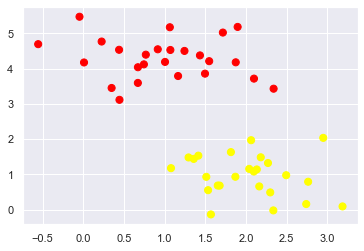

In [55]:
from sklearn.datasets._samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

A linear discriminative classifier would attempt to draw a straight line separating the two data sets.
In this example, there is more than one possible dividing line that would perfectly discriminate between the two classes.

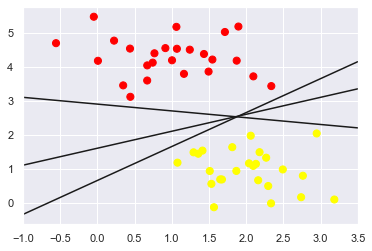

In [56]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plt.plot([0.6], [2.1], color='blue', markeredgewidth=2, markersize=30)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);

### Support Vector Machines: Maximizing the Margin

Instead of a zero-width line between the classes, we can consider a *margin* of some width around each line:

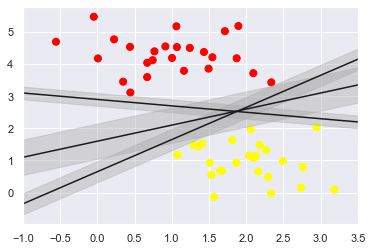

In [57]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)
    
plt.xlim(-1, 3.5);

In SVMs, the line that maximizes this margin is the one we choose as the optimal model. SVMs are an examples of such a *maximum margin estimator*.

To see an actual fit to the data, we will use a linear kernel SVM and set the $C$ parameter to a very large number:

In [58]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [59]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function of a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
        
    # Create grid to evaluate model
    xlim  = ax.get_xlim()
    ylim  = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    # Crosses values of x and y for 30x30 points
    Y, X = np.meshgrid(y, x)
    # ravel() flattens the 30x30 into 900 elements
    xy = np.vstack([X.ravel(), Y.ravel()])
    P = model.decision_function(xy.T).reshape(X.shape)
    
    # Plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='k');


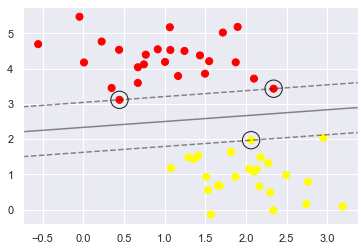

In [60]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap = 'autumn')
plot_svc_decision_function(model);

I couldn't quite re-create the support vectors in the text -- I am getting a different range of values from `model.decision_function()`.

In [61]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

SVMs become more powerful when combined with *kernels* (similar tot he idea from basis functions in linear regression).

Consider some data that is not linearly separable:

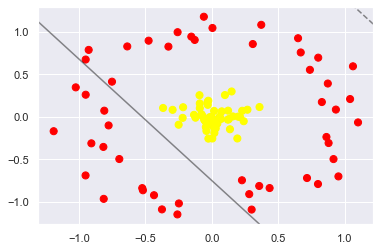

In [62]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=0.1, noise=0.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

The linear discriminator will never separate the data. One simple solution would be a radial basis function centered on the middle clump:

In [63]:
r = np.exp(-(X**2).sum(1))

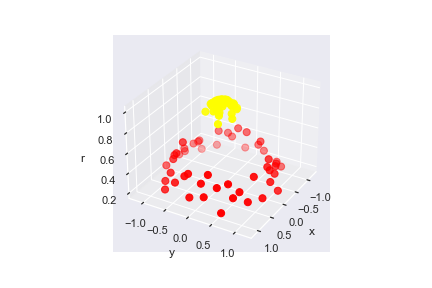

In [64]:
%matplotlib widget
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
# Can't get interact() working
#interact(plot_3D, elev=[-90, 90], azip=(-180, 180), X=fixed(X), y=fixed(y));
plot_3D()

We see that the additional dimension makes the data linearly separable with a plane at, say, r=0.7.

We needed to choose the right basis function to get the right projection. One strategy is to compute a basis function centered at every point in the dataset and let the SVM algorithm sift through the results. This type of basis function transformation is known as *kernel tansformation*, as it is based on a similarity relationship (or kernel) between each pair of points.

Projecting $N$ points into $N$ dimensions is not generally feasible, so we use the [kernel trick](https://en.wikipedia.org/wiki/Kernel_method#Mathematics:_the_kernel_trick).
This trick is built into the SVM.

In Scikit-Learn, we can apply kernelized SVM by switching linear kernel to an RBF (radial basis function) kernel:

In [68]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

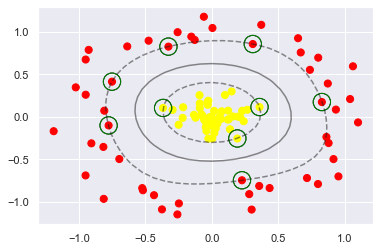

In [80]:
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none', edgecolors='green');

The examples so far were clean datasets with a perfect decision boundary. But what if the data has some amount of overlap?

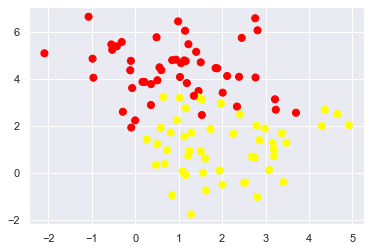

In [81]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

The "hardness" of a margin is controlled by a tuning parameter, most often known as $C$. For very large $C$, the margin is hard, and points cannot lie in it. For smaller $C$, the margin is softer and can grow to encompass some points.

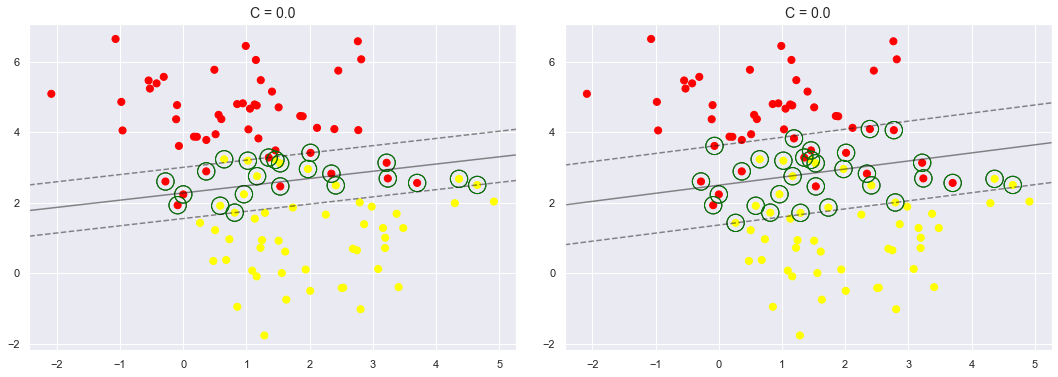

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none', edgecolors='green');
    axi.set_title(f'C = {0:.1f}', size=14)

The optimal value of $C$ will depend on the dataset, and should be tuned via cross-validation.

### Example: Face Recognition

As an example of SVMs, consider a facial recognition problem. We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures:

In [83]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

In [86]:
faces.target_names, faces.images.shape

(array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
        'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
        'Tony Blair'], dtype='<U17'),
 (1348, 62, 47))

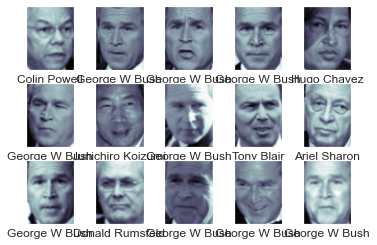

In [88]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Instead of using every pixel as a feature (62x47 = nearly 3000 pixels per picture), we will extract more meaningful features with principal components analysis:

In [91]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [93]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [94]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

In [95]:
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: total: 1min 40s
Wall time: 31.4 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [96]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

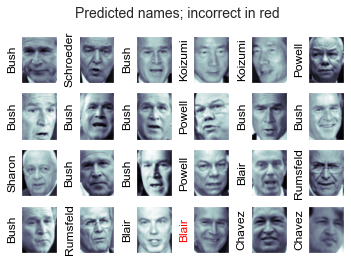

In [105]:
# Take a look at some predictions
fig, ax = plt.subplots(4, 6)

for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')

fig.suptitle('Predicted names; incorrect in red', size=14);

Just a single image was mis-labelled. We can print a classification report by class:

In [109]:
from sklearn.metrics import classification_report

print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



And the confusion matrix:

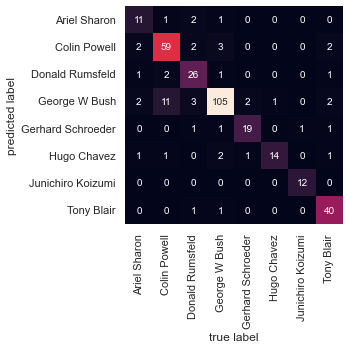

In [113]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Support Vector Machine Summary

SVMs are powerful classifiers for a number of reasons:

- Depend on relatively few support vectors means that they are very compact, and take up very little memory.
- Once the model is trained, the prediction phase is very fast.
- Because they are only affected by points near the margin, they work well with high-dimensional data.
- Their integration with kernel methods makes them very versatile.

But they have some disadvantages:

- They scale $\mathcal{O}(n^3)$ at worst, or $\mathcal{O}(n^2)$ for efficient implementations. This can be prohibitive for large samples.
- Their results are strongly dependent on a suitable choice for the softening parameter $C$. So careful cross-validation is important, which can be expensive as the data set grows.
- The results do not have a direct probabilistic interpretation, though it can be estimated via an internal cross-validation (see the `probability` parameter of `SVC`) but this can be costly.

## In Depth: Decision Trees and Random Forests

### Motivating Random Forests: Decision Trees

### Ensembles of Estimators: Random Forests

### Random Forest Regression

### Example: Random Forest for Classifying Digits

### Summary of Random Forests

## In Depth: Principal Component Analysis

### Introducing Principal Component Analysis

### PCA as Noise Filtering

### Example: Eigenfaces

### Principal Component Analysis Summary

## In Depth: Manifold Learning

### Manifold Learning: "HELLO"

### Mutlidimensional Scaling (MDS)

### MDS as Manifold Learning

### Nonlinear Embeddings: Where MDS Fails

### Some Thoughts on Manifold Methods

### Example: Isomap on Faces

Example: Visualizing Structure in Digits

In Depth: k-Means Clustering